In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



%load_ext autoreload
%autoreload 2

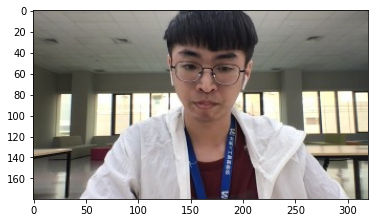

In [ ]:
# Import the required modules
%pylab inline 
from IPython.display import clear_output
import socket
import sys
import cv2
import matplotlib.pyplot as plt
import pickle
import numpy as np
import struct ## new
import zlib
from PIL import Image, ImageOps

HOST=''
PORT=8485

s=socket.socket(socket.AF_INET,socket.SOCK_STREAM)
print('Socket created')

s.bind((HOST,PORT))
print('Socket bind complete')
s.listen(10)
print('Socket now listening')

conn,addr=s.accept()

data = b""
payload_size = struct.calcsize(">L")
print("payload_size: {}".format(payload_size))
while True:
    while len(data) < payload_size:
        data += conn.recv(4096)
    # receive image row data form client socket
    packed_msg_size = data[:payload_size]
    data = data[payload_size:]
    msg_size = struct.unpack(">L", packed_msg_size)[0]
    while len(data) < msg_size:
        data += conn.recv(4096)
    frame_data = data[:msg_size]
    data = data[msg_size:]
    # unpack image using pickle 
    frame=pickle.loads(frame_data, fix_imports=True, encoding="bytes")
    frame = cv2.imdecode(frame, cv2.IMREAD_COLOR)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Resize frame
    bimg = ImageOps.expand(Image.fromarray(frame), border=(0, 80, 0, 80)).resize((256, 256), Image.ANTIALIAS)
    image = np.array(bimg)
    # show realtime image by PIL
    imshow(frame)
    show()
    # Display the frame until new frame is available
    clear_output(wait=True)